In [1]:
import torch
import torchvision
from torchvision import transforms
from torchinfo import summary

from PIL import Image

import cv2
%matplotlib inline
from matplotlib import pyplot as plt


from detector import cocos_name

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
classes =  cocos_name.COCOS_NAME
len(classes)

91

In [3]:
def get_model():
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights='FasterRCNN_ResNet50_FPN_Weights.DEFAULT')
    
    summary(model, 
        input_size=(1, 3, 300, 300), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        row_settings=["var_names"]
)
    model = model.to(device)
    model.eval()
    
    return model
    

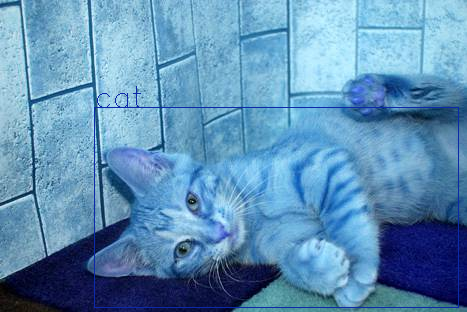

In [4]:
from detector import detector as dt
from PIL import Image
import cv2 
from IPython.display import display
import numpy as np
model = get_model()

path = "Dataset/SSD/cat/cat.10191.jpg"
image = dt.read_image(path)
prepare_img = dt.prepare_image(image)
bboxes, scores, labels, num  = dt.obj_detector(model, prepare_img, thresh = 0.8)
img_pred = dt.predicted(bboxes,
                        scores,
                        labels,
                        num,
                        image,
                        classes,
                        dt.color_create(classes),
                        False,
                        True)

display(Image.fromarray(img_pred))

In [6]:
cap = cv2.VideoCapture(0) # 0 - link - camera or video
cap.set(3,640) 
cap.set(4,480) 
colors = dt.color_create(classes)

while True:
    success, img = cap.read()
    
    prepare_img = dt.prepare_image(img)
    bboxes, scores, labels, num  = dt.obj_detector(model, prepare_img, thresh = 0.8)
    pred_image = dt.predicted(bboxes,
                            scores,
                            labels,
                            num,
                            img,
                            classes,
                            colors,
                            False,
                            True)
   

    cv2.imshow("Webcam", pred_image) 
    if cv2.waitKey(1) & 0xFF==ord('q'): 
        cap.release()
        break


cap.release()       
cv2.destroyAllWindows() 
cv2.waitKey(1)

-1

In [13]:
from timeit import default_timer as timer 
from pathlib import Path


image_path = "Dataset/SSD"
test_dir = image_path + "/cat/"
test_data_paths = list(Path(test_dir).glob("*.jpg"))
test_data_paths[:5]
len(test_data_paths)


start_time = timer()
preds = []
pred_time = 0

with torch.no_grad():
    for path in test_data_paths:
        start_time = timer()
        
        image = dt.read_image(str(path))
        prepare_img = dt.prepare_image(image)
        bboxes, scores, labels, num  = dt.obj_detector(model, prepare_img, thresh = 0.8)
        pred_image = dt.predicted(bboxes,
                                scores,
                                labels,
                                num,
                                img,
                                classes,
                                colors,
                                False,
                                True)
        
        preds.append(img_pred)
        pred_time += round(timer() - start_time, 5)
print(pred_time / len(test_data_paths))

0.08692050000000001
